# Project: Train a Quadcopter How to Fly


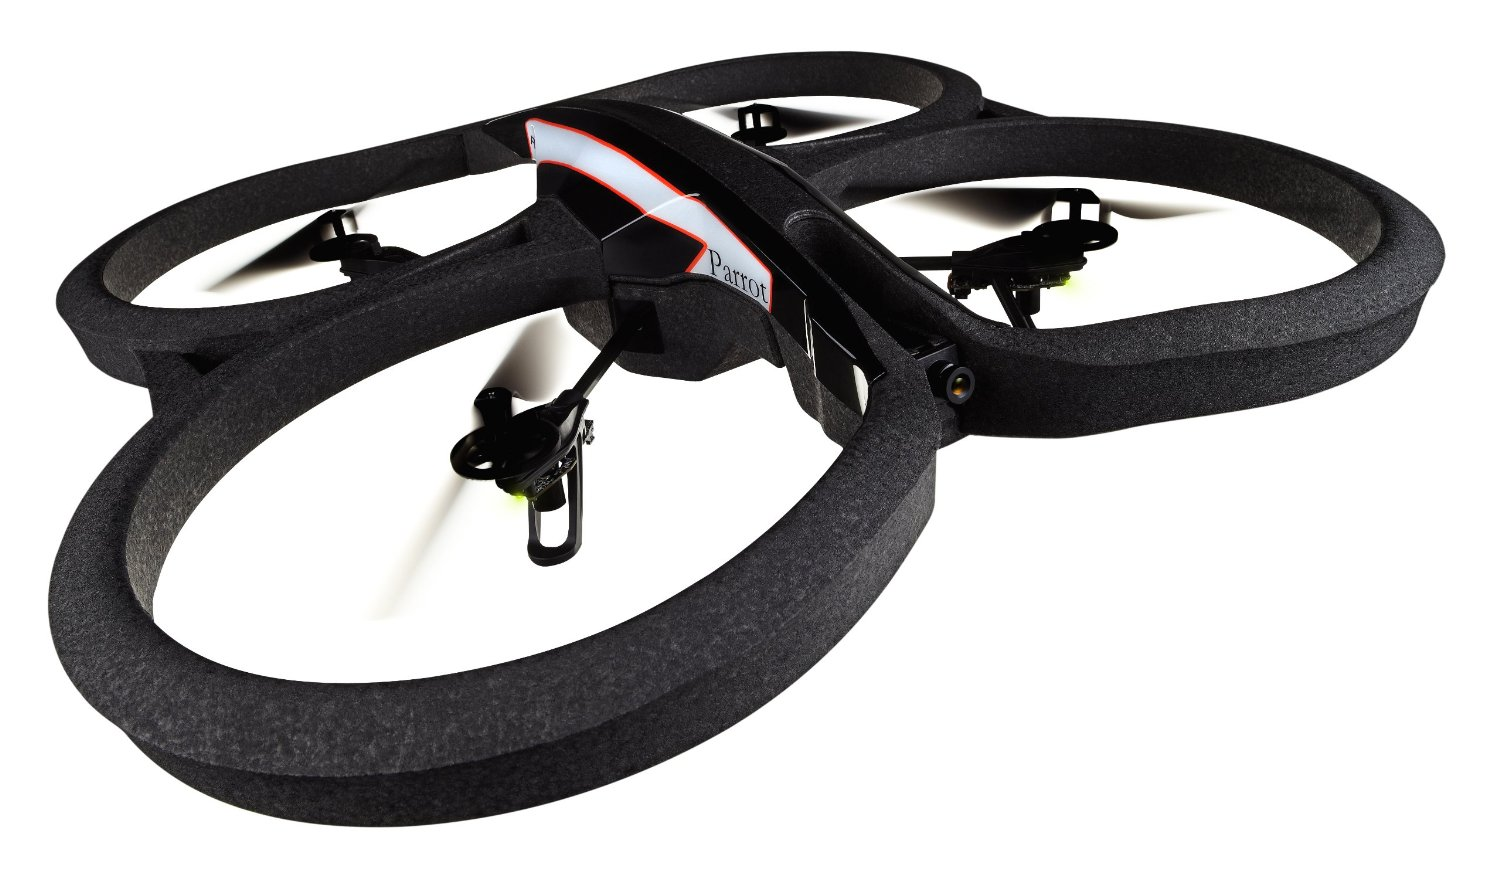

## Overview
This project is design to teach a quadcopter how to fly using Deep Reinforcement Learning.
I used an environment provided by www.udacity.com, included in "physics_sim.py", it doesn't provide a Virtual 3D environment but it also doesn't need any configuration.
In case you want to see the drone on a 3D environment you can follow up the instructions at https://github.com/udacity/RL-Quadcopter.
For this project I'll use a reinforcement learning algorithm called Deep Deterministic Policy Gradients (DDPG) using Tensorflow.
I also used Ornstein-Uhlenbeck process to implement some "noise" to the output of the model, using it to help the agent exploring the environment.
You can read more about it at https://en.wikipedia.org/wiki/Ornstein%E2%80%93Uhlenbeck_process .

## DDPG theory
Deep Deterministic Policy Gradient (DDPG) is an algorithm which concurrently learns a Q-function and a policy. It uses off-policy data and the Bellman equation to learn the Q-function, and uses the Q-function to learn the policy.
This approach is closely connected to Q-learning, and is motivated the same way: if you know the optimal action-value function Q^*(s,a), then in any given state, the optimal action a^*(s) can be found by solving 

a* *(s) = argmax a Q* *(s,a).

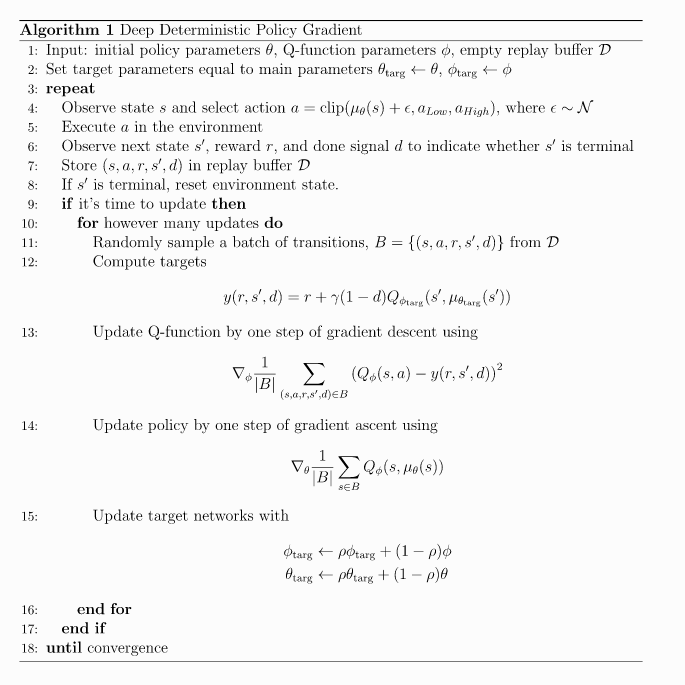

If you want to learn more about it check https://spinningup.openai.com/en/latest/algorithms/ddpg.html

## Files

- `Tasks.py`: File where all tasks are defined.
- `ActorCritic.py`: File containing the structure for actor's model and critic's model.
- `Helpers.py`: File containing helper functions like "Replay" and "Ornstein-Uhlenbeck process".
- `agent.py`: File where is defined the agent.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

## Controlling the Quadcopter

In the code cell below is defined a simple agent to show how to use the simulator to control the quadcopter.

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  It selects a random action (revolution per seconds) for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

## Testing the basic agent

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.csv` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from Tasks import Takeoff, Hover, Land, Flyto

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 0., 0., 0., 0.])   # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.csv'                         # file name for saved results

# Setup
task = Takeoff(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

#### Visualizing how the position of the quadcopter evolved during the simulation.

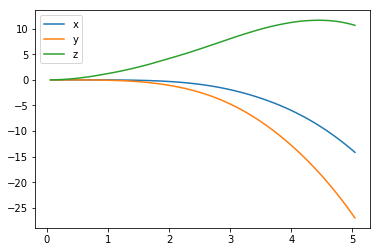

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

#### Visualizing the velocity of the quadcopter.

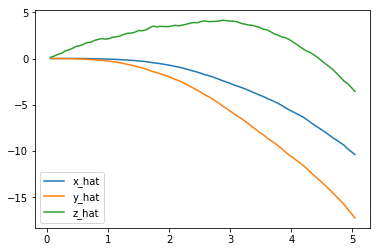

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

#### Visualizing the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes).

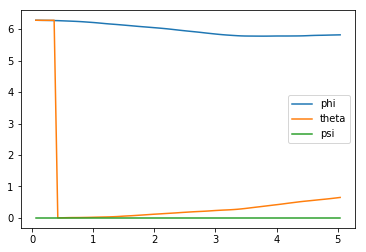

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

#### Visualizing velocities (in radians per second) corresponding to each of the Euler angles.

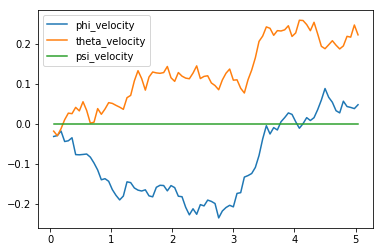

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

#### Visualizing agent's choice of actions.  

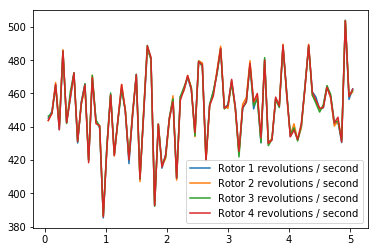

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

#### Simulator's state variables:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-14.15877562 -26.97589883  10.66325222   5.81881179   0.65077719
   0.        ]
[-10.38865773 -17.23748932  -3.55318309]
[0.04815464 0.22282388 0.        ]


## Train the agent

In the following code I've implemented the training function.
It takes as input the task, number of episodes and the score value considered as target for the early stopping.
After 100 consecutives high scores or after N episodes, the function returns the trained agent and the score at each episode.

In [9]:
from agent import DDPG
import sys


def train(task, num_episodes, high_score):
    """Returns the trained agent with the score for each episode.
    The agent used for this training is always the same, but it learns a different task,
    based on the reward function associated to that task."""
    agent = DDPG(task)
    rewards_list = list()
    best = -99
    worst = 99
    total_reward = 0
    # early stopping
    counter = 0
    consecutive_high_rewards = 100

    for i_episode in range(1, num_episodes+1):
        state = agent.reset_episode() # start a new episode
        total_reward = 0
        while True:
            action = agent.act(state, mode="train")
            next_state, reward, done = task.step(action)
            agent.step(action, reward, next_state, done)
            state = next_state
            total_reward += reward
            if done:
                print("\rEpisode = {:4d}, score = {:.3f}, best = {:.3f}, worst = {:.3f}".format(
                    i_episode, total_reward, best, worst), end="")
                rewards_list.append((i_episode, total_reward))
                break
        # update best and worst score
        best = total_reward if total_reward>best else best
        worst = total_reward if total_reward<worst else worst
        # stop training if 100 consecutive rewards are over the "high score"
        if total_reward >= high_score:
            counter += 1
        else:
            counter = 0
        if counter >= consecutive_high_rewards:
            break
        sys.stdout.flush()
        
    return agent, rewards_list

### Takeoff training

In [14]:
takeoff_agent, takeoff_score = train(Takeoff(), 500, -3)

Episode =  127, score = -2.892, best = -2.892, worst = -54.57666

### Hover training

In [16]:
hover_agent, hover_score = train(Hover(), 500, 175)

Episode =  500, score = 181.794, best = 183.447, worst = 52.063

### Land training

In [17]:
land_agent, land_score = train(Land(), 500, 175)

Episode =  225, score = 177.185, best = 182.812, worst = 40.623

### Fly training

In [22]:
fly_agent, fly_score = train(Flyto(), 500, 170)

Episode =  145, score = 182.074, best = 183.934, worst = 41.180

## Plot the Rewards

In [24]:
def plot_rewards(rewards_, title):
    eps, rews = np.array(rewards_).T
    cumsum_rews = np.cumsum(np.insert(rews, 0, 0))
    smoothed_rews = (cumsum_rews[10:] - cumsum_rews[:-10]) / 10
    plt.plot(eps[-len(smoothed_rews):], smoothed_rews)
    plt.plot(eps, rews, color='grey', alpha=0.3)
    plt.title(title)
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')

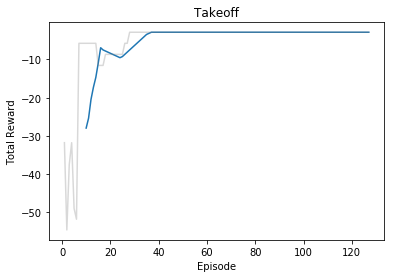

In [25]:
plot_rewards(takeoff_score, "Takeoff")

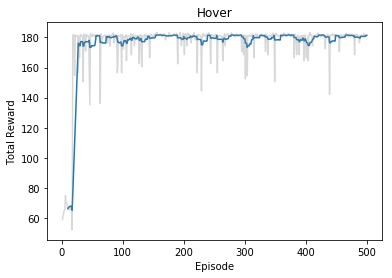

In [26]:
plot_rewards(hover_score, "Hover")

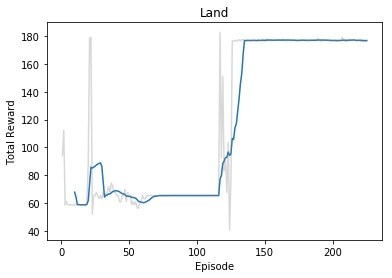

In [27]:
plot_rewards(land_score, "Land")

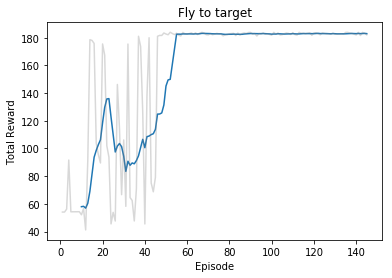

In [28]:
plot_rewards(fly_score, "Fly to target")

## Reflections

#### Reward functions
Every reward function is designed to return a value between -1 and 1 for every step.
It is computed by applying the hyperbolic tangent to a scoring number.
The scoring number is defined as: 
    - 1 - 0.3 * (z position - z target position) (takeoff)
    - 1 - 0.003 * (xyz position - xyz target position) (hover and fly to position)
    - 1 - 0.003 * (z position - z target position) - 0.0005 * (actual angles - 0 angles) (Land)

#### Model structure

I used Deep Deterministic Policy Gradients algorithm for this project, performing really well after tuning a lot of hyperparameters.
I achieved the best score in the fastest time by using the following hyperparameters:
- gamma = 0.99 (discount factor)
- tau = 0.01   (soft update of target parameters)
- Ornstein-Uhlenbeck process with mu = 0, theta = 0.15, sigma = 0.2 (exploration)
- Replay buffer with a batch size of 64 (stores information and uses a random batch for training)

I designed 2 different NN architectures for the actor and the critic:
- Actor NN:
    - Dense layer with 18 nodes (input layer)
    - Dense layer with 32 nodes, L2 regularization of value 1e-6, batch normalization and relu activation (hidden1)
    - Dense layer with 64 nodes, L2 regularization of value 1e-6, batch normalization and relu activation (hidden2)
    - Dense layer with 128 nodes, L2 regularization of value 1e-6, batch normalization and relu activation (hidden3)
    - Dense layer with 128 nodes and relu activation (hidden4)
    - Dense layer with 4 nodes and sigmoid activation (output layer)
    - lambda layer to map the output to the proper range
    - then I applyed Adam optimizer with learning rate of 6.5e-4 and mean error loss function
- Critic NN, i used 2 combined networks:
    - states:
        - Dense layer with 18 nodes (input layer 1)
        - Dense layer with 32 nodes, L2 regularization of value 1e-6, batch normalization and relu activation (hidden 1.1)
        - Dense layer with 64 nodes and relu activation (hidden 1.2)
    - actions:
         - Dense layer with 18 nodes (input layer 2)
         - Dense layer with 32 nodes, L2 regularization of value 1e-6, batch normalization and relu activation (hidden 2.1)
         - Dense layer with 64 nodes and relu activation (hidden 2.2)
    - combine the 2 networks and apply relu activation function
    - Dense layer with 1 node (output layer)
    - then I applyed Adam optimizer with learning rate of 6.5e-4 and mean squared error loss function

#### Graph analysis

By looking at the graphs, we can see that these were cases of eureka effect and after few episodes the agent was able to complete the tasks.
After an initial time for exploration, the performance of every task stay stable for 100 episodes, at that point I implemented an early stopping.